In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/UpdatedResumeDataSet.csv",encoding = 'utf-8')

In [ ]:
df['cleaned_resume']=''
df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        962 non-null    object
 1   Resume          962 non-null    object
 2   cleaned_resume  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


In [ ]:
print ("Displaying the distinct categories of resume:\n\n ")
print (df['Category'].unique())

Displaying the distinct categories of resume:

 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [ ]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (df['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


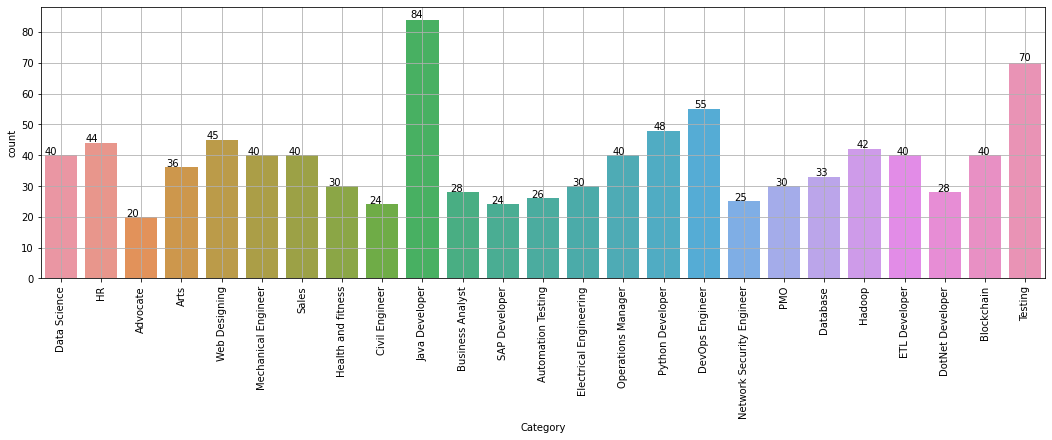

In [ ]:
#Visualization of the categories in the dataset
import seaborn as sns
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

In [ ]:
from matplotlib.gridspec import GridSpec
targetCounts = df['Category'].value_counts()
targetLabels  = df['Category'].unique()

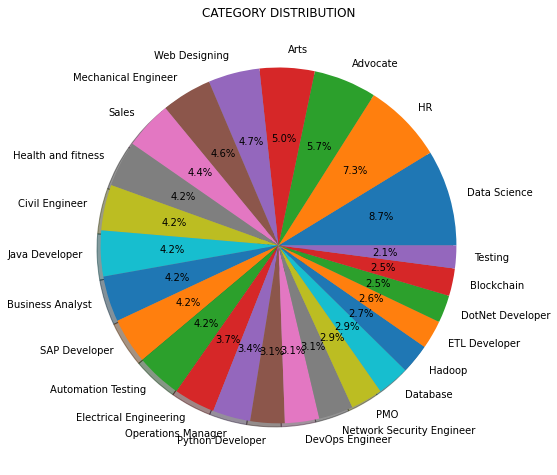

In [ ]:
plt.figure(1, figsize=(20,18))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

In [ ]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x))

In [ ]:
df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
X = df['cleaned_resume'].values
y = df['Category'].values

In [ ]:
# Replacing space between charecter(e.g "Data Science" to "DataScience") 
# To get single array EX=> {Data:6},{Science:7},{HR:8}
# So we will have some array of 2D and some of 1D. That can cause the problem..
for i in range(len(y)):
  y[i] = y[i].replace(" ","")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state=42, shuffle=True, test_size=0.17)

In [ ]:
#Tokenize features and labels
vocab_size = 6000
embedding_dim = 16
max_length = 6000
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [ ]:
#Tokenizing features 
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok, lower=True)
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_sequences = tokenizer.texts_to_sequences(X_train)
X_padded = pad_sequences(X_sequences,maxlen=max_length,padding=padding_type, truncating=trunc_type)

In [ ]:
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(y)
word_index = tokenizer.word_index

In [ ]:
y_sequences = tokenizer.texts_to_sequences(y_train)

In [ ]:
y_testing_sequences = tokenizer.texts_to_sequences(y_test)

In [ ]:
y_sequences

[[3],
 [2],
 [19],
 [6],
 [5],
 [9],
 [1],
 [10],
 [3],
 [10],
 [13],
 [9],
 [2],
 [2],
 [6],
 [15],
 [9],
 [11],
 [23],
 [13],
 [11],
 [3],
 [2],
 [2],
 [4],
 [8],
 [8],
 [15],
 [2],
 [21],
 [13],
 [11],
 [16],
 [14],
 [6],
 [7],
 [10],
 [6],
 [17],
 [2],
 [11],
 [1],
 [18],
 [1],
 [8],
 [25],
 [1],
 [3],
 [20],
 [9],
 [8],
 [6],
 [16],
 [20],
 [1],
 [19],
 [25],
 [4],
 [9],
 [15],
 [3],
 [2],
 [13],
 [2],
 [20],
 [8],
 [25],
 [8],
 [20],
 [16],
 [1],
 [3],
 [20],
 [13],
 [14],
 [1],
 [7],
 [23],
 [8],
 [6],
 [17],
 [1],
 [3],
 [24],
 [9],
 [19],
 [6],
 [3],
 [24],
 [4],
 [23],
 [20],
 [10],
 [7],
 [9],
 [18],
 [1],
 [19],
 [10],
 [12],
 [2],
 [7],
 [21],
 [1],
 [1],
 [19],
 [22],
 [1],
 [8],
 [5],
 [2],
 [1],
 [13],
 [1],
 [2],
 [11],
 [11],
 [4],
 [2],
 [7],
 [12],
 [4],
 [17],
 [2],
 [19],
 [10],
 [1],
 [2],
 [9],
 [6],
 [5],
 [22],
 [4],
 [23],
 [3],
 [23],
 [14],
 [11],
 [4],
 [17],
 [8],
 [22],
 [11],
 [23],
 [2],
 [24],
 [3],
 [5],
 [14],
 [1],
 [7],
 [13],
 [25],
 [2],
 [5],
 

In [ ]:
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
embedding_dim = 64

model = Sequential([
  Embedding(vocab_size, embedding_dim,),
  Bidirectional(LSTM(64)),
  Dense(64, activation='relu'),
  Dense(26, activation='softmax')# 26 lables are there....
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          384000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 26)                1690      
                                                                 
Total params: 459,994
Trainable params: 459,994
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

y_padded = np.array(y_sequences)
y_testing_padded = np.array(y_testing_sequences)

In [ ]:
earlyStopping = EarlyStopping(monitor='val_accuracy',patience=1)

history = model.fit(X_padded,y_padded,epochs = 10, validation_data=(testing_padded,y_testing_padded ), callbacks=[earlyStopping])

Epoch 1/10
25/25 [==============================] - 276s 11s/step - loss: 3.2353 - accuracy: 0.1228 - val_loss: 3.1998 - val_accuracy: 0.1463
Epoch 2/10
25/25 [==============================] - 285s 11s/step - loss: 2.9955 - accuracy: 0.1541 - val_loss: 2.8353 - val_accuracy: 0.1890
Epoch 3/10
25/25 [==============================] - 277s 11s/step - loss: 2.5914 - accuracy: 0.2356 - val_loss: 2.4562 - val_accuracy: 0.3354
Epoch 4/10
25/25 [==============================] - 272s 11s/step - loss: 2.0062 - accuracy: 0.4160 - val_loss: 1.7862 - val_accuracy: 0.4268
Epoch 5/10
25/25 [==============================] - 267s 11s/step - loss: 1.3883 - accuracy: 0.5840 - val_loss: 1.2308 - val_accuracy: 0.6768
Epoch 6/10
25/25 [==============================] - 270s 11s/step - loss: 1.0172 - accuracy: 0.7469 - val_loss: 1.1003 - val_accuracy: 0.6951
Epoch 7/10
25/25 [==============================] - 273s 11s/step - loss: 0.8360 - accuracy: 0.8195 - val_loss: 0.7696 - val_accuracy: 0.7805
Epoch 

In [ ]:
score = model.evaluate(testing_padded, y_testing_padded, verbose=1)

6/6 [==============================] - 7s 1s/step - loss: 0.2309 - accuracy: 0.9817


In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.23090794682502747
Test Accuracy: 0.9817073345184326


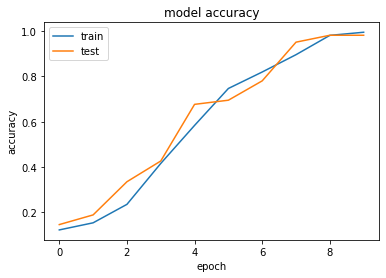

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

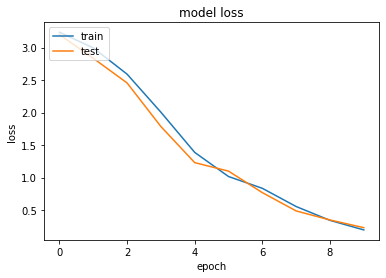

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()